#1. AutoML 라이브러리: pycaret
- https://pycaret.org/guide/

In [ ]:
#!pip install pycaret
!pip install pycaret[full]

- 설치 후, 필요 시 런타임 재시작

In [ ]:
from pycaret.classification import *
#from pycaret.regression import *

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data #2d
cancer.target #1d

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

In [ ]:
clf = setup(data=df, target='target', train_size=0.8, session_id=10)

- data : 데이터셋
- target : target 지정
- train_size : 파티셔닝 시 trainset 사이즈
- session_id : random결과 고정

In [ ]:
models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9692,0.9891,0.9895,0.9624,0.9758,0.9336,0.9343,0.3550
lightgbm,Light Gradient Boosting Machine,0.9648,0.9852,0.9755,0.9687,0.9720,0.9247,0.9248,0.5600
rf,Random Forest Classifier,0.9626,0.9824,0.9719,0.9685,0.9702,0.9201,0.9201,0.2400
catboost,CatBoost Classifier,0.9626,0.9859,0.9824,0.9589,0.9705,0.9195,0.9200,8.8200
xgboost,Extreme Gradient Boosting,0.9561,0.9841,0.9615,0.9683,0.9647,0.9065,0.9069,0.1950
ridge,Ridge Classifier,0.9516,0.0000,0.9895,0.9369,0.9625,0.8946,0.8973,0.0450
qda,Quadratic Discriminant Analysis,0.9516,0.9888,0.9509,0.9714,0.9610,0.8974,0.8979,0.0750
lda,Linear Discriminant Analysis,0.9516,0.9804,0.9965,0.9312,0.9627,0.8941,0.8985,0.0700
ada,Ada Boost Classifier,0.9494,0.9851,0.9614,0.9580,0.9597,0.8919,0.8920,0.3150
gbc,Gradient Boosting Classifier,0.9473,0.9780,0.9579,0.9579,0.9579,0.8873,0.8873,0.4550


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

- sort : 평가지표
- n_select : 선택할 모형 개수
- fold : K-fold CV 지정


In [ ]:
models

In [ ]:
# 랜덤포레스트 모델 생성
rf = create_model('rf', fold=2)
#predict_model(rf)

In [ ]:
tuned_rf = tune_model(rf, fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.9853,0.9650,0.9583,0.9617,0.8966,0.8966
1,0.9559,0.9822,0.9789,0.9521,0.9653,0.9051,0.9057
Mean,0.9539,0.9838,0.9720,0.9552,0.9635,0.9008,0.9012
Std,0.0021,0.0015,0.0069,0.0031,0.0018,0.0042,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# ROC 커브
plot_model(tuned_rf, 'auc')

In [ ]:
# 오차 행렬
plot_model(tuned_rf, 'confusion_matrix') #혼동행렬

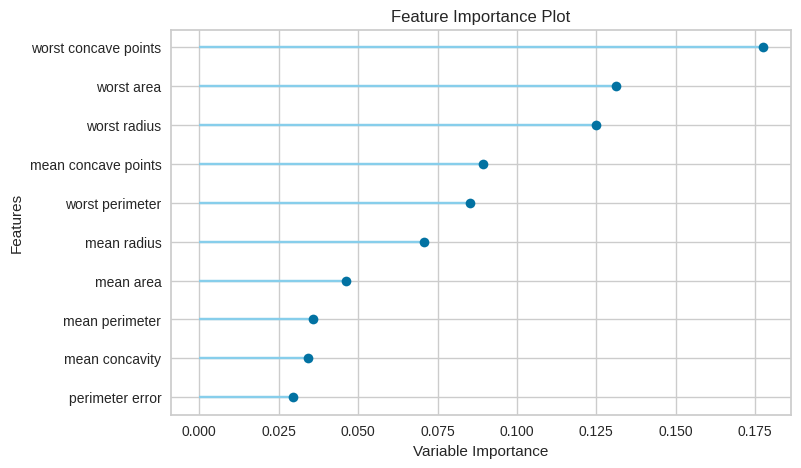

In [ ]:
# 피처 중요도
plot_model(tuned_rf, 'feature')

In [ ]:
blended = blend_models(estimator_list=models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9693,0.9898,0.9790,0.9722,0.9756,0.9342,0.9342
1,0.9648,0.9850,0.9789,0.9653,0.9720,0.9244,0.9246
Mean,0.9670,0.9874,0.9789,0.9688,0.9738,0.9293,0.9294
Std,0.0023,0.0024,0.0001,0.0035,0.0018,0.0049,0.0048


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
pred = predict_model(blended)
pred.prediction_label

### mortdefault에 대해서 적용해보세요.

In [ ]:
!unzip mortDefault.zip

Archive:  mortDefault.zip
  inflating: mortDefault.csv         


In [ ]:
import numpy as np
data = pd.read_csv("mortDefault.csv")
data.drop(  "year", axis=1, inplace=True)
data.creditScore = data.creditScore.replace("qqq",0).replace("@@@", 0)
data.creditScore = data.creditScore.astype("int64")

In [ ]:
from sklearn.model_selection import train_test_split
df, test = train_test_split(data, test_size=0.8, stratify = data['default'])

In [ ]:
clf = setup(data=df, target='default', train_size=0.8, session_id=11)

In [ ]:
models = compare_models(sort='Recall', n_select=3, fold=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9072,0.0000,0.6214,0.3046,0.2758,0.2520,0.3287,3.2000
dt,Decision Tree Classifier,0.9631,0.6405,0.3012,0.2757,0.2879,0.2690,0.2693,0.4000
ada,Ada Boost Classifier,0.9770,0.9543,0.2420,0.5823,0.3413,0.3316,0.3655,3.3250
et,Extra Trees Classifier,0.9749,0.9129,0.2309,0.4861,0.3129,0.3018,0.3238,6.8200
rf,Random Forest Classifier,0.9761,0.9222,0.2216,0.5433,0.3147,0.3047,0.3370,14.2900
lightgbm,Light Gradient Boosting Machine,0.9772,0.9540,0.2191,0.6071,0.3219,0.3128,0.3557,2.8050
xgboost,Extreme Gradient Boosting,0.9768,0.9517,0.2165,0.5838,0.3157,0.3065,0.3462,0.9450
catboost,CatBoost Classifier,0.9768,0.9535,0.2163,0.5822,0.3152,0.3060,0.3455,33.6800
gbc,Gradient Boosting Classifier,0.9774,0.9544,0.2148,0.6240,0.3194,0.3107,0.3574,9.5075
knn,K Neighbors Classifier,0.9742,0.7969,0.2049,0.4521,0.2819,0.2707,0.2929,2.0900


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

- sort : 평가지표
- n_select : 선택할 모형 개수
- fold : K-fold CV 지정


In [ ]:
# 랜덤포레스트 모델 생성
rf = create_model('rf', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.9205,0.2420,0.5425,0.3347,0.3244,0.3521
1,0.9763,0.9243,0.2218,0.5501,0.3162,0.3063,0.3395
Mean,0.9762,0.9224,0.2319,0.5463,0.3254,0.3154,0.3458
Std,0.0000,0.0019,0.0101,0.0038,0.0093,0.0091,0.0063


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*`<사용 가능한 모형>`*
- 'lr' - Logistic Regression
- 'knn' - K Neighbors Classifier
- 'nb' - Naive Bayes
- 'dt' - Decision Tree Classifier
- 'svm' - SVM - Linear Kernel
- 'rbfsvm' - SVM - Radial Kernel
- 'gpc' - Gaussian Process Classifier
- 'mlp' - MLP Classifier
- 'ridge' - Ridge Classifier
- 'rf' - Random Forest Classifier
- 'qda' - Quadratic Discriminant Analysis
- 'ada' - Ada Boost Classifier
- 'gbc' - Gradient Boosting Classifier
- 'lda' - Linear Discriminant Analysis
- 'et' - Extra Trees Classifier
- 'xgboost' - Extreme Gradient Boosting
- 'lightgbm' - Light Gradient Boosting Machine
- 'catboost' - CatBoost Classifier

In [ ]:
tuned_rf = tune_model(rf, fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9753,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9753,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9753,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Std,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#RandomForest인 경우 parameter 예시
params = {    'n_estimators': [90,100,110],
    'max_depth': [5,6,7],
    'max_features': [2, 3, 4]}

tuned_rf = tune_model(rf, fold=2, optimize='Accuracy', n_iter=5, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9771,0.9485,0.1824,0.6278,0.2827,0.2746,0.3304
1,0.9775,0.9484,0.1809,0.6654,0.2845,0.2768,0.3394
Mean,0.9773,0.9484,0.1817,0.6466,0.2836,0.2757,0.3349
Std,0.0002,0.0001,0.0008,0.0188,0.0009,0.0011,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 5 candidates, totalling 10 fits


###탐색 알고리즘 변경

In [ ]:
!pip install pycaret[tuners]

In [ ]:
!pip install optuna

In [ ]:
# dt
dt = create_model('dt', fold=2)

# tune model optuna
#tune_model(dt, search_library = 'optuna')

# tune model scikit-optimize
#tune_model(dt, search_library = 'scikit-optimize')

# tune model tune-sklearn
#tune_model(dt, search_library = 'tune-sklearn', search_algorithm = 'hyperopt')


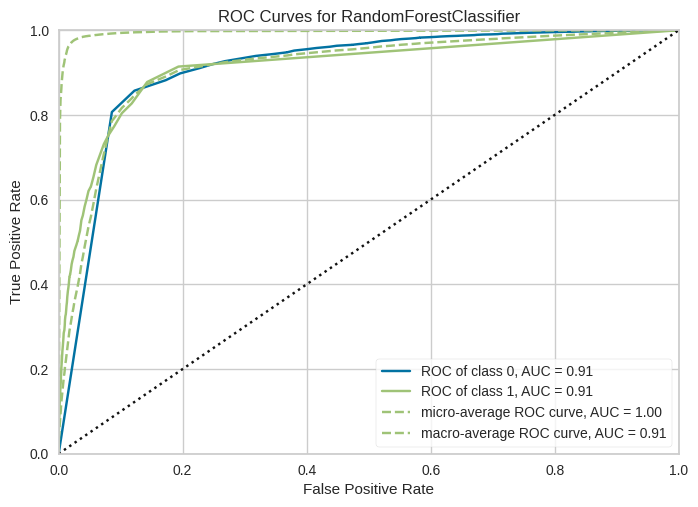

In [ ]:
# ROC 커브
plot_model(tuned_rf, 'auc')

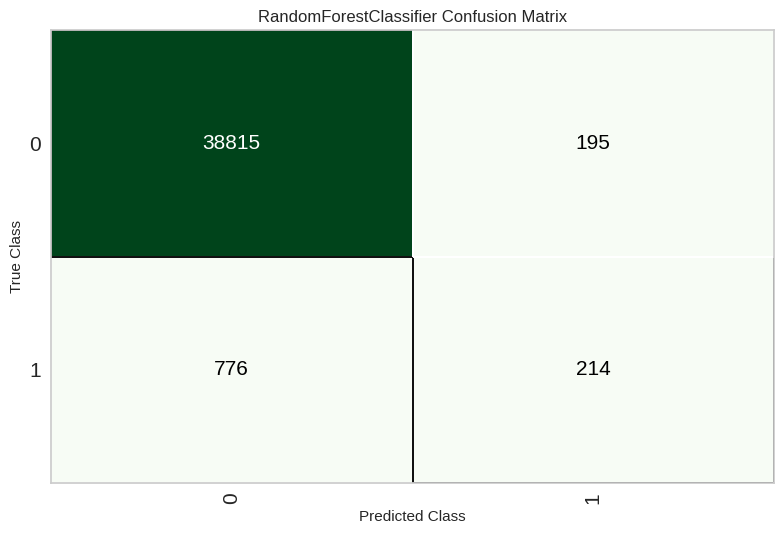

In [ ]:
# 오차 행렬
plot_model(tuned_rf, 'confusion_matrix')

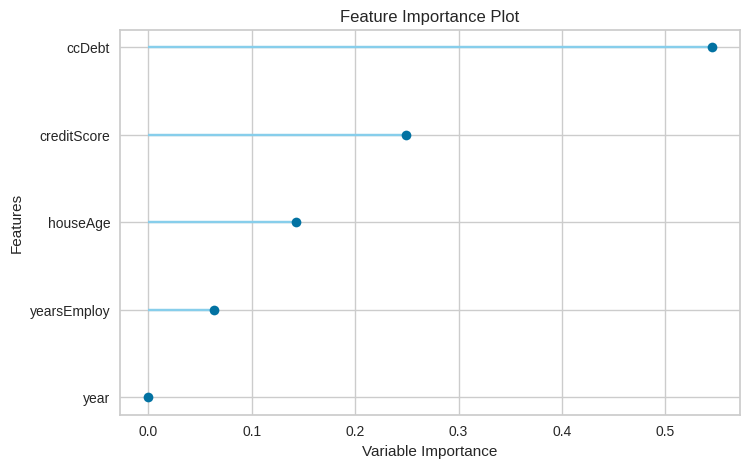

In [ ]:
# 피처 중요도
plot_model(tuned_rf, 'feature')

In [ ]:
blended = blend_models(estimator_list=models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9773,0.9492,0.1622,0.6715,0.2613,0.2541,0.3229
1,0.9777,0.9506,0.1572,0.7335,0.2588,0.2523,0.3331
Mean,0.9775,0.9499,0.1597,0.7025,0.2601,0.2532,0.3280
Std,0.0002,0.0007,0.0025,0.0310,0.0012,0.0009,0.0051


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
pred = predict_model(blended, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9775,0.9529,0.1560,0.7000,0.2551,0.2483,0.3236


In [ ]:
pred = predict_model(tuned_rf, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9760,0.9141,0.2175,0.5367,0.3095,0.2995,0.3317


In [ ]:
pred.head()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default,prediction_label,prediction_score
674775,711,19.0,4.0,8191,2009,0,0,0.88
465480,675,21.0,2.0,9104,2009,1,0,0.82
591630,699,22.0,3.0,4781,2009,0,0,1.00
491730,749,24.0,5.0,3258,2009,0,0,1.00
347441,720,19.0,6.0,7911,2009,0,0,0.94


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
finalize_model(tuned_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['houseAge', 'yearsEmploy',
                                             'ccDebt', 'year'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(ex...
                ('actual_estimator',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=7, max_features=4,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=11,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
save_model(tuned_rf, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['houseAge', 'yearsEmploy',
                                              'ccDebt', 'year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(ex...
                 ('trained_model',
                  RandomForestClas

- diabetes.csv를 읽으셔서 pycaret으로 분류모형
- accuracy기준으로 상위 4개의 모형을 선택하세요
- 1개 모형을 선택하셔서 tuning도 해보세요
- 예측 결과를 확인해보세요.
- 43분까지해보세요

In [ ]:
dia = pd.read_csv("diabetes.csv")
clf=setup(data=dia, target='Outcome', train_size=0.8, session_id=11)
models = compare_models(sort='Accuracy', n_select=4, fold=2)

In [ ]:
rf = create_model('rf', fold=2)
tuned_rf = tune_model(rf, fold=2, optimize='Accuracy')
predict_model(tuned_rf, data=데이터프레임)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(......)